In [28]:
import sys
import os
import glob
sys.path.append("..")
from py_helpers.general_helpers import *

# Define the path to the data
labs = True
if labs:
    data_path = "/media/hsa22/Expansion/MBM_fmri/sub-NIHm32/ses-01/fmri_slices/sub-NIHm32_ses-01_task-rest_run-LR-2"
    slices_path = os.path.join(data_path, "BOLD_slices")
else:
    data_path = "/rds/general/user/hsa22/ephemeral/MBM_fmri/sub-NIHm32/ses-01/fmri_slices/sub-NIHm32_ses-01_task-rest_run-LR-2"
    slices_path = os.path.join(data_path, "BOLD_slices")

# Define the MBM and MBCA folders
mbm_folder = os.path.join(slices_path, "MBM")
mbca_folder = os.path.join(slices_path, "MBCA")

# Grab all the npy files
mbm_files = glob.glob(os.path.join(mbm_folder, "*.npy"))
mbca_files = glob.glob(os.path.join(mbca_folder, "*.npy"))

# Sort the files according to the number at the end
mbm_files = sorted(mbm_files, key=lambda x: int(x.split("_")[-1].split(".")[0]))
mbca_files = sorted(mbca_files, key=lambda x: int(x.split("_")[-1].split(".")[0]))

# Print the number of files
print("MBM files: {}".format(len(mbm_files)))
print("MBCA files: {}".format(len(mbca_files)))

MBM files: 512
MBCA files: 512


In [29]:
import numpy as np

def load_and_stack(files_list):
    """Load and stack numpy arrays from a list of files."""
    arrays = [np.load(file).squeeze(0) for file in files_list]
    return np.stack(arrays, axis=0)

mbm_data = load_and_stack(mbm_files)
mbca_data = load_and_stack(mbca_files)

# Transpose the data to be in the correct format
mbm_data = mbm_data.T
mbca_data = mbca_data.T

print(f"MBM data shape: {mbm_data.shape}")
print(f"MBCA data shape: {mbca_data.shape}")

MBM data shape: (54, 512)
MBCA data shape: (116, 512)


MBM correlation matrix shape: (54, 54)
MBCA correlation matrix shape: (116, 116)


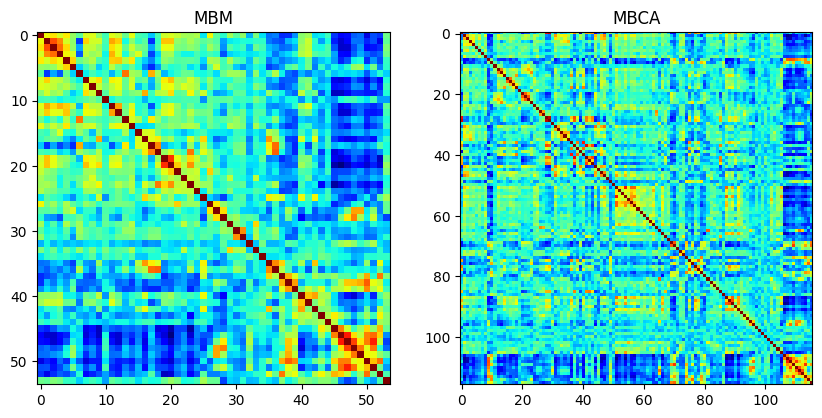

In [30]:
import matplotlib.pyplot as plt

# Get the correlation matrix for each subject
mbm_corr = np.corrcoef(mbm_data)
mbca_corr = np.corrcoef(mbca_data)

# Print the shape of the correlation matrices
print(f"MBM correlation matrix shape: {mbm_corr.shape}")
print(f"MBCA correlation matrix shape: {mbca_corr.shape}")

# Plot the correlation matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mbm_corr, interpolation='nearest', aspect='equal', cmap='jet')
ax[1].imshow(mbca_corr, interpolation='nearest', aspect='equal', cmap='jet')
ax[0].set_title("MBM")
ax[1].set_title("MBCA")
plt.show()

In [31]:
# Define the processed BOLD folder
processed_bold_folder = os.path.join(data_path, "processed_BOLD")
check_output_folders(processed_bold_folder, "Processed BOLD folder", wipe=False)

# Define the output paths
mbm_output_path = os.path.join(processed_bold_folder, "MBM_BOLD.npy")
mbca_output_path = os.path.join(processed_bold_folder, "MBCA_BOLD.npy")

# Define the output correlation paths
mbm_corr_output_path = os.path.join(processed_bold_folder, "MBM_corr.npy")
mbca_corr_output_path = os.path.join(processed_bold_folder, "MBCA_corr.npy")

# Define the output figure paths
mbm_fig_path = os.path.join(processed_bold_folder, "MBM_corr.png")
mbca_fig_path = os.path.join(processed_bold_folder, "MBCA_corr.png")

# Save the data
np.save(mbm_output_path, mbm_data)
np.save(mbca_output_path, mbca_data)
np.save(mbm_corr_output_path, mbm_corr)
np.save(mbca_corr_output_path, mbca_corr)

# Save the figures
fig.savefig(mbm_fig_path)
fig.savefig(mbca_fig_path)